# HW2
### Import data

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
mat = scipy.io.loadmat('hw2_data.mat')
X1, X2, Y1, Y2 = mat['X1'], mat['X2'], mat['Y1'], mat['Y2']

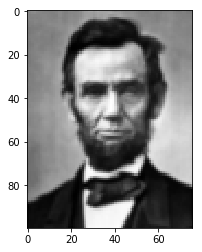

In [3]:
Y1_2D = Y1.reshape(100, 76)
plt.imshow(Y1_2D, cmap='gray')
plt.show()

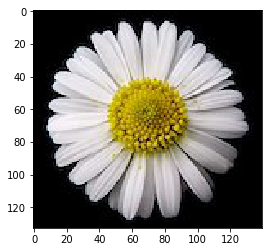

In [4]:
Y2_2D = Y2.reshape(133, 140, 3)/255
plt.imshow(Y2_2D)
plt.show()

### Define Network

In [10]:
class Network():
    def __init__(self):
        self.layers = (
            Linear(2, 128),
            sigmoid(),
            Linear(128, 256),
            sigmoid(),
            Linear(256, 3),
            sigmoid()
        )
        self.depth = len(self.layers)
        self.sequential()  
        self.lr = 0.001
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.eps = 1e-8
       
    def sequential(self):
        for i in range(1, self.depth):
            if isinstance(self.layers[i], Linear):
                self.layers[i].prev = self.layers[i-1]

    def forward(self, x):
        self.out = x
        for i in range(self.depth):
            self.out = self.layers[i].forward(self.out)
    
    def backward(self, ground_truth):
        gradient = (self.out - ground_truth) #/ self.out.shape[0]
        for i in range(self.depth):
            gradient = self.layers[self.depth - i - 1].backward(gradient)

    def update(self):
        for i in range(self.depth):
            if isinstance(self.layers[i], Linear):
                #self.layers[i].w -= self.lr * self.layers[i].dw
                #self.layers[i].b -= self.lr * self.layers[i].db
                self.layers[i].m_w = self.beta1 * self.layers[i].m_w + (1-self.beta1) * self.layers[i].dw
                self.layers[i].v_w = self.beta2 * self.layers[i].v_w + (1-self.beta2) * (self.layers[i].dw ** 2)
                self.layers[i].w -= self.lr * self.layers[i].m_w / (self.layers[i].v_w ** (1/2) + self.eps)
                
                self.layers[i].m_b = self.beta1 * self.layers[i].m_b + (1-self.beta1) * self.layers[i].db
                self.layers[i].v_b = self.beta2 * self.layers[i].v_b + (1-self.beta2) * (self.layers[i].db ** 2) 
                self.layers[i].b -= self.lr * self.layers[i].m_b / (self.layers[i].v_b ** (1/2) + self.eps)                
                
    
    def loss(self, ground_truth):
        loss = self.out - ground_truth
        loss = np.sum(loss ** 2) / 2 / loss.shape[0]
        return loss
    
def total_loss(x, y):
    nn.forward(x)
    loss = nn.out - y
    loss = np.sum(loss ** 2) / 2 / loss.shape[0]
    return loss
    
class Linear():
    def __init__(self, input_size, output_size):
        self.prev = None
        self.result = None
        self.w = np.random.normal(0, 1, [input_size, output_size])
        #self.b = np.random.normal(0, 1, output_size)
        self.b = np.zeros(output_size)
        self.m_w = np.zeros([input_size, output_size])
        self.v_w = np.zeros([input_size, output_size])
        self.m_b = np.zeros(output_size)
        self.v_b = np.zeros(output_size)        
    def forward(self, x):
        self.result = np.dot(x, self.w) + self.b
        self.x = x
        return self.result
    def backward(self, gradient):
        self.dw = np.dot(self.x.T, gradient) / self.x.shape[0]
        self.db = np.sum(gradient, axis=0)   / self.x.shape[0]
        self.dx = np.dot(gradient, self.w.T)
        return self.dx

class sigmoid():
    def forward(self, x):
        self.result = 1 / (1 + np.e**(-x))
        return self.result
    def backward(self, gradient):
        return gradient * self.result * (1 - self.result)

Epoch: 50 Loss: 0.15196603614170687
Epoch: 100 Loss: 0.14826071068284785
Epoch: 150 Loss: 0.14686112843346089
Epoch: 200 Loss: 0.1427187585477439
Epoch: 250 Loss: 0.1404843017857509
Epoch: 300 Loss: 0.13852164509474504
Epoch: 350 Loss: 0.13704442158811217
Epoch: 400 Loss: 0.13543119331259332
Epoch: 450 Loss: 0.13334445313745127
Epoch: 500 Loss: 0.13349406585753104
Epoch: 550 Loss: 0.13117558733198537
Epoch: 600 Loss: 0.12979560885793595
Epoch: 650 Loss: 0.1289027989805384
Epoch: 700 Loss: 0.12623505690586936
Epoch: 750 Loss: 0.12549857420291335
Epoch: 800 Loss: 0.12402515585097741
Epoch: 850 Loss: 0.12239019304278534
Epoch: 900 Loss: 0.1215726735168697
Epoch: 950 Loss: 0.11898221525663558
Epoch: 1000 Loss: 0.11896743177340074


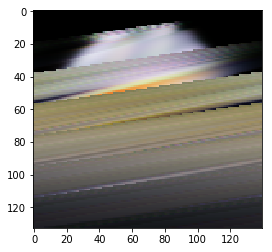

Epoch: 1050 Loss: 0.1166983231182546
Epoch: 1100 Loss: 0.11648872767594186
Epoch: 1150 Loss: 0.1156423055018795
Epoch: 1200 Loss: 0.11465927412471925
Epoch: 1250 Loss: 0.11259649684984115
Epoch: 1300 Loss: 0.11094208343345052
Epoch: 1350 Loss: 0.10958782702673878
Epoch: 1400 Loss: 0.11074304482884809
Epoch: 1450 Loss: 0.10804442579108581
Epoch: 1500 Loss: 0.10630108868480767
Epoch: 1550 Loss: 0.10939866239581464
Epoch: 1600 Loss: 0.10478336113403675
Epoch: 1650 Loss: 0.10800980000013144
Epoch: 1700 Loss: 0.10421237798605909
Epoch: 1750 Loss: 0.10265190557570246
Epoch: 1800 Loss: 0.10289664558749141
Epoch: 1850 Loss: 0.10364396118263386
Epoch: 1900 Loss: 0.10112251812027145
Epoch: 1950 Loss: 0.09917676462800978
Epoch: 2000 Loss: 0.09887655851555947


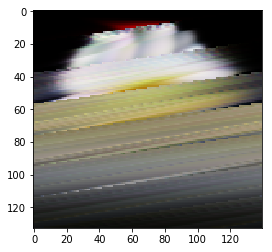

Epoch: 2050 Loss: 0.09832444797763765
Epoch: 2100 Loss: 0.09782450540226414
Epoch: 2150 Loss: 0.09730643059013348
Epoch: 2200 Loss: 0.09759283611174911
Epoch: 2250 Loss: 0.09667671307332137
Epoch: 2300 Loss: 0.09624105004034333
Epoch: 2350 Loss: 0.09585950225639352
Epoch: 2400 Loss: 0.09567442536759325
Epoch: 2450 Loss: 0.09440221637955212
Epoch: 2500 Loss: 0.09374009126839633
Epoch: 2550 Loss: 0.09378894578851849
Epoch: 2600 Loss: 0.09291514740700171
Epoch: 2650 Loss: 0.09262471664893722
Epoch: 2700 Loss: 0.09241120856915676
Epoch: 2750 Loss: 0.09132134015944618
Epoch: 2800 Loss: 0.09149125712884683
Epoch: 2850 Loss: 0.08985124649380374
Epoch: 2900 Loss: 0.08949076609388208
Epoch: 2950 Loss: 0.08988179241647008
Epoch: 3000 Loss: 0.08961951393924573


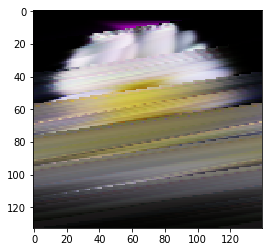

Epoch: 3050 Loss: 0.08939633062497347
Epoch: 3100 Loss: 0.08771366926298738
Epoch: 3150 Loss: 0.0866118238741743
Epoch: 3200 Loss: 0.08815669635470061
Epoch: 3250 Loss: 0.08527724930507152
Epoch: 3300 Loss: 0.0854112084024989
Epoch: 3350 Loss: 0.08371606287714269
Epoch: 3400 Loss: 0.08322705754960452
Epoch: 3450 Loss: 0.08210450557467557
Epoch: 3500 Loss: 0.08140836336745814
Epoch: 3550 Loss: 0.08035804364476783
Epoch: 3600 Loss: 0.07829878098462015
Epoch: 3650 Loss: 0.07715162080146537
Epoch: 3700 Loss: 0.07696716467609167
Epoch: 3750 Loss: 0.07487628311687564
Epoch: 3800 Loss: 0.07395709251577376
Epoch: 3850 Loss: 0.0728053974818474
Epoch: 3900 Loss: 0.07236548944387096
Epoch: 3950 Loss: 0.0705686945517947
Epoch: 4000 Loss: 0.0680539034133475


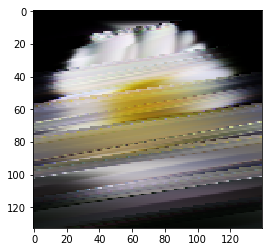

Epoch: 4050 Loss: 0.0657061952618171
Epoch: 4100 Loss: 0.06491434513052226
Epoch: 4150 Loss: 0.063515851419154
Epoch: 4200 Loss: 0.061644713332013816
Epoch: 4250 Loss: 0.06196414679493913
Epoch: 4300 Loss: 0.058390387209990895
Epoch: 4350 Loss: 0.058270773855093126
Epoch: 4400 Loss: 0.055761360062554624
Epoch: 4450 Loss: 0.0583867918898399
Epoch: 4500 Loss: 0.055199102251265376
Epoch: 4550 Loss: 0.05300867139196016
Epoch: 4600 Loss: 0.052385213279951756
Epoch: 4650 Loss: 0.05232825555881754
Epoch: 4700 Loss: 0.05018609036750283
Epoch: 4750 Loss: 0.051966803271505824
Epoch: 4800 Loss: 0.04824361806457129
Epoch: 4850 Loss: 0.04809192587120689
Epoch: 4900 Loss: 0.047879481965390124
Epoch: 4950 Loss: 0.04653028556382049
Epoch: 5000 Loss: 0.04573823372254369


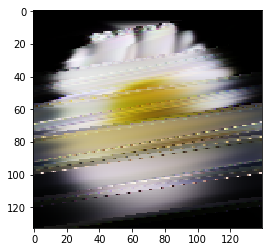

Epoch: 5050 Loss: 0.04528765145859642
Epoch: 5100 Loss: 0.04734200998016488
Epoch: 5150 Loss: 0.044047665620792036
Epoch: 5200 Loss: 0.044465454751240696
Epoch: 5250 Loss: 0.042826733048791525
Epoch: 5300 Loss: 0.04554149448863981
Epoch: 5350 Loss: 0.04198691228505332
Epoch: 5400 Loss: 0.042781632875020466
Epoch: 5450 Loss: 0.04148455266693128
Epoch: 5500 Loss: 0.0409670267634147
Epoch: 5550 Loss: 0.03978170080049527
Epoch: 5600 Loss: 0.041170673674089234
Epoch: 5650 Loss: 0.03861723846773527
Epoch: 5700 Loss: 0.038863806264572184
Epoch: 5750 Loss: 0.037298580521449784
Epoch: 5800 Loss: 0.03852277124491139
Epoch: 5850 Loss: 0.03778858247822696
Epoch: 5900 Loss: 0.03852710396763158
Epoch: 5950 Loss: 0.03607097329443539
Epoch: 6000 Loss: 0.03551205694272173


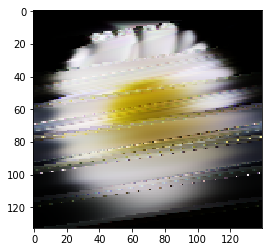

Epoch: 6050 Loss: 0.035317132406610184
Epoch: 6100 Loss: 0.03680156943377654
Epoch: 6150 Loss: 0.0340321347895405
Epoch: 6200 Loss: 0.033724371326786066
Epoch: 6250 Loss: 0.034493207331344665
Epoch: 6300 Loss: 0.03750440096789644
Epoch: 6350 Loss: 0.033207049783343684
Epoch: 6400 Loss: 0.03239088068652375
Epoch: 6450 Loss: 0.032606239666368816
Epoch: 6500 Loss: 0.03191633054491672
Epoch: 6550 Loss: 0.032394661824345
Epoch: 6600 Loss: 0.03138714572196967
Epoch: 6650 Loss: 0.03223018735788383
Epoch: 6700 Loss: 0.03268680106328893
Epoch: 6750 Loss: 0.033636110692474484
Epoch: 6800 Loss: 0.03166890057155919
Epoch: 6850 Loss: 0.032356270333318594
Epoch: 6900 Loss: 0.030189878683623664
Epoch: 6950 Loss: 0.0304665538322857
Epoch: 7000 Loss: 0.03069858324109696


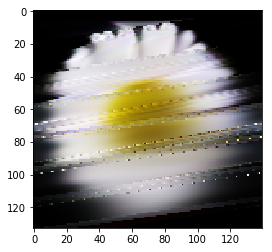

Epoch: 7050 Loss: 0.02945038811938503
Epoch: 7100 Loss: 0.02952277789826132
Epoch: 7150 Loss: 0.030777862448332895
Epoch: 7200 Loss: 0.02950833256733546


In [ ]:
def draw():
    nn.forward(X2)
    Y2_pred = nn.out
    Y2_pred = Y2_pred.reshape(133, 140, 3)
    plt.imshow(Y2_pred)
    plt.show()            

epoch_num = 4000
batch_size = 1024
batch_num = X2.shape[0] // batch_size
nn = Network()
X2_2 = X2
Y2_2 = Y2/255
loss = 1
e = 0
index = np.arange(X2.shape[0])


#for e in range(epoch_num):#epoch_num
while loss > 0.029:
    np.random.shuffle(index)
    X2_2 = X2_2[index]
    Y2_2 = Y2_2[index]
    for b in range(batch_num):#batch_size
        nn.forward(X2_2[batch_size * b : batch_size * b + batch_size])
        nn.backward(Y2_2[batch_size * b : batch_size * b + batch_size])
        nn.update()
        #print(nn.loss(Y2_2[batch_size * b : batch_size * b + batch_size]))
    e += 1
    if e % 50 == 0:
        loss = total_loss(X2, Y2/255)
        print('Epoch:',e, 'Loss:', loss)
    if e % 1000 == 0:
        draw()